In [3]:
# Step 0: imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib.colors import ListedColormap

# Optional: make plots look better in notebooks
%matplotlib inline
plt.style.use('default')


In [5]:
# Step 1: Load & inspect
df = pd.read_csv("C:/Users/Chandana D/Downloads/archive (12)/Iris.csv")     # change path if needed
print("Shape:", df.shape)
display(df.head())
print("\nColumn names:", list(df.columns))


Shape: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



Column names: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [8]:
# --- Step 2: Define Features (X) and Target (y) ---
X = df.drop(columns=["Id", "Species"])   # drop ID and target
y = df["Species"]

In [9]:
print("Feature columns:", X.columns.tolist())
print("Target column:", y.name)
print("Classes:", y.unique())

Feature columns: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Target column: Species
Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 4: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("\n📊 Baseline Results (K=3):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


📊 Baseline Results (K=3):
Accuracy: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



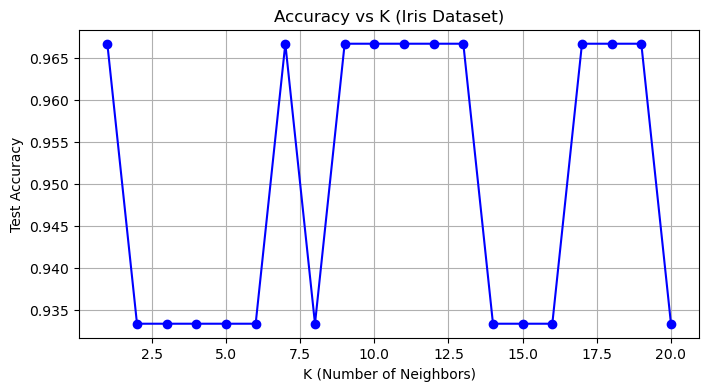

In [13]:
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

plt.figure(figsize=(8,4))
plt.plot(k_values, accuracies, marker='o', color='b')
plt.title("Accuracy vs K (Iris Dataset)")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

In [14]:
best_k = k_values[np.argmax(accuracies)]
print(f"✅ Best K value: {best_k} with accuracy {max(accuracies):.3f}")


✅ Best K value: 1 with accuracy 0.967



📈 Evaluation (Best K):
Accuracy: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



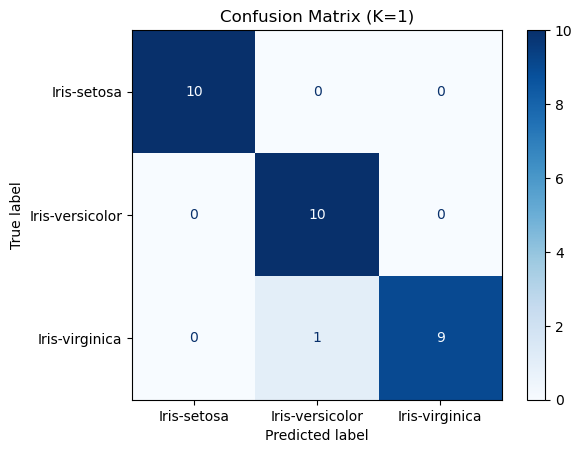

In [15]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

print("\n📈 Evaluation (Best K):")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best, labels=knn_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()

In [16]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    KNeighborsClassifier(n_neighbors=best_k),
    X_scaled, y, cv=cv, scoring='accuracy'
)
print(f"\n🧮 Cross-Validation Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")



🧮 Cross-Validation Accuracy: 0.940 ± 0.053


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

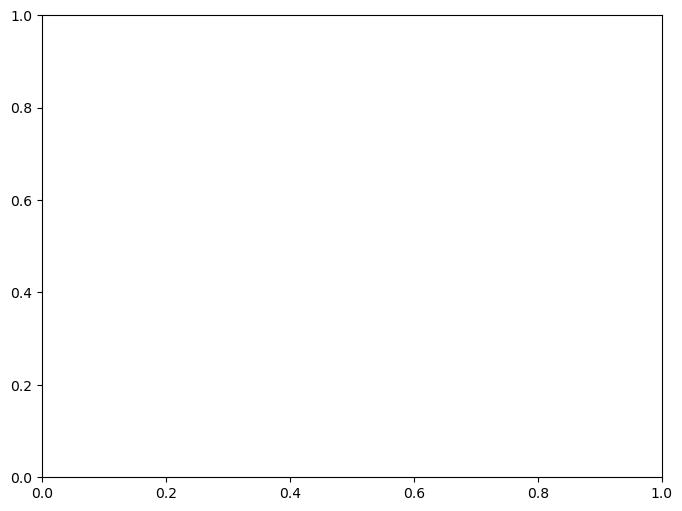

In [17]:
X_vis = X_scaled[:, :2]
y_vis = y

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42, stratify=y_vis
)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_v, y_train_v)

x_min, x_max = X_vis[:,0].min() - 1, X_vis[:,0].max() + 1
y_min, y_max = X_vis[:,1].min() - 1, X_vis[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
colors = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)

for i, cls in enumerate(knn_vis.classes_):
    idx = np.where(y_train_v == cls)
    plt.scatter(X_train_v[idx,0], X_train_v[idx,1], edgecolor='k', label=cls, s=50)

plt.xlabel("SepalLengthCm (scaled)")
plt.ylabel("SepalWidthCm (scaled)")
plt.title(f"KNN Decision Boundaries (K={best_k})")
plt.legend()
plt.show()

In [18]:
print("\n✅ Task 6 Completed Successfully!")
print(f"Best K: {best_k}, Test Accuracy: {accuracy_score(y_test, y_pred_best):.3f}")
print(f"Cross-Validation Mean Accuracy: {cv_scores.mean():.3f}")


✅ Task 6 Completed Successfully!
Best K: 1, Test Accuracy: 0.967
Cross-Validation Mean Accuracy: 0.940
